
# LABORATORIO DE REDES NEURONALES

-----------------------------------------------

En este laboratoria se estara realizando el modelo de redes neuronales **feed for ward**

IMPORTAMOS LAS LIBRERIAS UTILICES PARA REALIZAR EL MODELO DE REDES NEURONALES

In [39]:
#Usamos el codigo proporsionado para lectura de datos
import mnist_reader

#Librerias a utilizar
from RedesNeuronales import *

#libreria a importar
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import random
from scipy import optimize as op
from PIL import Image

#### LECTURA DE DATOS

In [2]:
#Obtenemos los datos concatenados
Train = mnist_reader.load_mnist('data/fashion', kind='train')
Test = mnist_reader.load_mnist('data/fashion', kind='t10k')

#### PREPARACION DE LOS DATOS

Separamos los datos de los dataframe para que se pueda trabajar de manera separada, ya que los primeros datos del dataframe representan label (nombre de prenda) y los demas representan los datos de la imagen 

In [3]:
#Separamos los datos de entrenamiento
X_train, y_train = Train
#Separamos los datos de pruebra
X_test, y_test = Test

In [4]:
mTrain, nTrain = X_train.shape
print(mTrain, nTrain)

60000 784


In [5]:
mTest, nTest = X_test.shape
print(mTest, nTest)

10000 784


In [6]:
#Convertimos los datos a int64 para mejor manejor
X_train = np.array(X_train, dtype=np.int64)
X_test = np.array(X_test, dtype=np.int64)

In [7]:
#Normalizamos los datos
X_train = X_train / 1000.0
X_test = X_test / 1000.0

In [8]:
X = np.vstack((
    XTrain,
    XTest
))

#mX, nX = X.shape
mX, nX = (70000, 784)

In [9]:
#reformamos los valores de y
y_train = y_train.reshape(mTrain, 1)
y_test = y_test.reshape(mTest, 1)

In [10]:
#Unimos los valores de label
Y = np.vstack((
    y_train,
    y_test
))

Y = Y.reshape(mX, 1)

print("[INFO] Se obtienen las labels de los datos")

[INFO] Se obtienen las labels de los datos


In [11]:
# Matriz del label (nombre de la prenda)
y = (Y == np.arange(10, dtype=np.int))

In [12]:
#Estructura del modelo de la red neuronal NN (NEURAL NET)
# 130 neuronas de entrada y 10 neuronas de salida
NN = np.array([
    nX,
    130,
    10
])

In [13]:
#Shape de la matrices peso Theta
theta_shapes  = np.hstack((
    NN[1:].reshape(len(NN) - 1, 1),
    (NN[:-1] + 1).reshape(len(NN) - 1, 1)
))

In [14]:
#Se creo un set de pesos de Thetas, es decir, Matriz de peso de forma random
flat_thetas = flatten_list_of_arrays([
    np.random.rand(*theta_shape)
    for theta_shape in theta_shapes
])

#### OPTIMIZACION DE LOS DATOS

In [15]:
#Este codigo tarda bastante en compilar, por lo que se recomienda no ejecutar...
#thetasOptimizadas = op.minimize(
#    fun = cost_function,
#    x0 = flat_thetas,
#    args = (theta_shapes, X, Y),
#    method = 'L-BFGS-B',
#    jac = back_propagation,
#   options = {'disp': True, 'maxiter': 3000}

# Guardamos los datos en un txt
#np.savetxt("data/Optimizada.txt", thetasOptimizadas.x)

#### PROBAMOS EL MODELO CON LOS DATOS DE TEST

Este modelo se realiza con las tetas optimizadas

In [16]:
#Obtenemos los datos de las thetas optimizadas
thetas_opti = np.loadtxt("data/Optimizada.txt")

In [17]:
#Obtenemos la matriz de theta
thetas = inflate_matrixes(
    thetas_opti,
    theta_shapes
)

In [18]:
# Implementacion del feed for ward
FeedForWard = feed_forward(
    thetas,
    X_test
)

#### ANALISIS DE LOS DATOS OBTENIDOS

In [19]:
#Obtenemos los valores predichos por el modelo, en el label para mejor analisis
labelPredicho = np.argmax(FeedForWard[-1], axis = 1)

Se realiza un calculo para ver cuantos aciertos y ver el porcentaje de exactitud que hay en el modelo

In [20]:
accuracy = 0
fail = 0
#range el tamaño de los labels predichos con el modelo
length = len(FeedForWard[-1])

#Ciclo para verificar la exactitud del modelo
for i in range(length):
    #si el valor del test es igual al valor encontrado
    if(labelPredicho[i] == y_test[i][0]):
        accuracy += 1
    #si no es igual
    else:
        fail +=1

print("Aciertos: ", accuracy)
print("Fallos: ", fail)
    

Aciertos:  8607
Fallos:  1393


In [21]:
#Calculamos el porcentaje de exactitud del modelo
percentage = round(100* accuracy/length)
print("El porcentaje de exactitud es: ", percentage ,"%")

El porcentaje de exactitud es:  86 %


### VISUALIZACION DE DATOS

In [57]:
X_test, y_test = Test

In [59]:
#array de clasificacion
label = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [119]:
#Funcion para convertir de lista a matriz para generar las imagenes
#Resive los datos de la imagen en formato uint8
#Tamaño corresponiente a la imagen
def createImagen(data, size):
    matrixImage = [(x, x, x) for x in data]
    return np.asarray(matrixImage).reshape(size, size, 3)

Verificamos con las labels si es real lo antes predicho, pero con la diferencia de que solo revisamos 5 datos para mayor visualizacion, se mostrara tambien la imagen de la prenda real 

Imagen Real


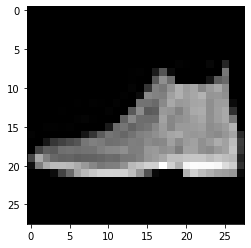

Real:  Ankle boot
Predicho: Ankle boot


Imagen Real


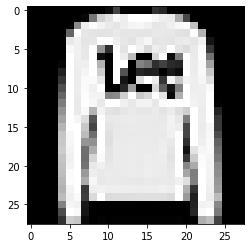

Real:  Pullover
Predicho: Pullover


Imagen Real


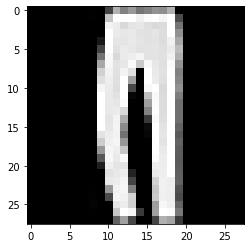

Real:  Trouser
Predicho: Trouser


Imagen Real


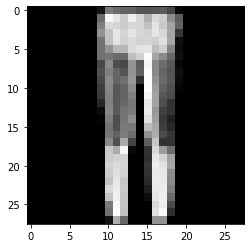

Real:  Trouser
Predicho: Trouser


Imagen Real


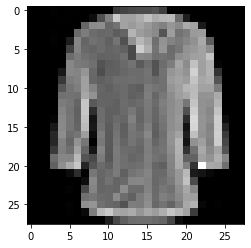

Real:  Shirt
Predicho: Shirt




In [120]:
for i in range(5):
    #contador +=i 
    #matrixImage = [(x, x, x) for x in X_test[contador]]
    #data = np.asarray(matrixImage).reshape(28, 28, 3)
    
    dataMatrix = createImagen(X_test[i], 28)
    
    # Image module, sirve para generar la imagen correspondiente
    imagen = Image.fromarray(dataMatrix, None)
    imagen.save('imagenPrenda.png')
    
    img = mpimg.imread('imagenPrenda.png')
    imgplot = plt.imshow(img)
    
    print("Imagen Real")
    plt.show()
    print("Real: ", label[y_test[i]])
    print("Predicho: " + label[labelPredicho[i]])
    print("\n")

### CONCLUSIONES

En conclusion se puede observar que se tuvo un acierto de 86%, lo cual es bastante alto dentro del modelo. Este modelo realizado con 130 capas, lo cual por la cantidad de datos obtendios se logro un acierto favorable. Los posibles errores pueden ser dados a la conversion de los datos, ya que el dataset dado se convirtio a int64 aproximo varios de los datos que eran parecido. Dentro del modelo no se observa que se pueda realizar overfitting